In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

it20_data = pd.read_csv('ball_by_ball_it20.csv')
innings1 = it20_data.loc[it20_data['Innings'] == 1]

innings1 = innings1.drop(innings1[innings1['Balls Remaining'] == 0].index)
innings1.reset_index(drop=True, inplace=True)

print('No of Matches: ', innings1['Match ID'].nunique())
print('Data Frame Length: ', len(innings1.index))

innings1.head()

No of Matches:  1842
Data Frame Length:  223270


,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,Extra Runs,Runs From Ball,Ball Rebowled,Extra Type,Wicket,Method,Player Out,Innings Runs,Innings Wickets,Target Score,Runs to Get,Balls Remaining,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,WD Parnell,1,0,1,0,[],0,NaN,NaN,1,0,259,NaN,119,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,WD Parnell,1,0,1,0,[],0,NaN,NaN,2,0,259,NaN,118,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,WD Parnell,0,0,0,0,[],1,caught,BA King,2,1,259,NaN,117,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,WD Parnell,0,0,0,0,[],0,NaN,NaN,2,1,259,NaN,116,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,WD Parnell,4,0,4,0,[],0,NaN,NaN,6,1,259,NaN,115,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

features = ['Innings Runs', 'Innings Wickets', 'Balls Remaining', 'Total Batter Runs','Total Non Striker Runs','Batter Balls Faced','Non Striker Balls Faced', 'Runs From Ball']

cutoff_date = '2018-01-01'

train_data = innings1[innings1['Date'] < cutoff_date]
test_data = innings1[innings1['Date'] >= cutoff_date]

X_train = train_data[features]
y_train = train_data['Target Score']
X_test = test_data[features]
y_test = test_data['Target Score']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()

reg.fit(X_train, y_train)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Coefficient of determination (R-squared):', r2)

Coefficients: [ 43.18078475 -12.95257606  28.48199759   3.140428     2.93691617
  -2.94218484  -2.76006423   0.30026084]
Intercept: 152.73300536015861
Mean squared error: 774.1076904239505
Coefficient of determination (R-squared): 0.5307429520747798


In [4]:
x = np.array([122, 4, 25, 1, 42, 1, 27, 0])
x = scaler.transform(x.reshape(1, -1))
print(reg.predict(x))

[161.33626419]


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

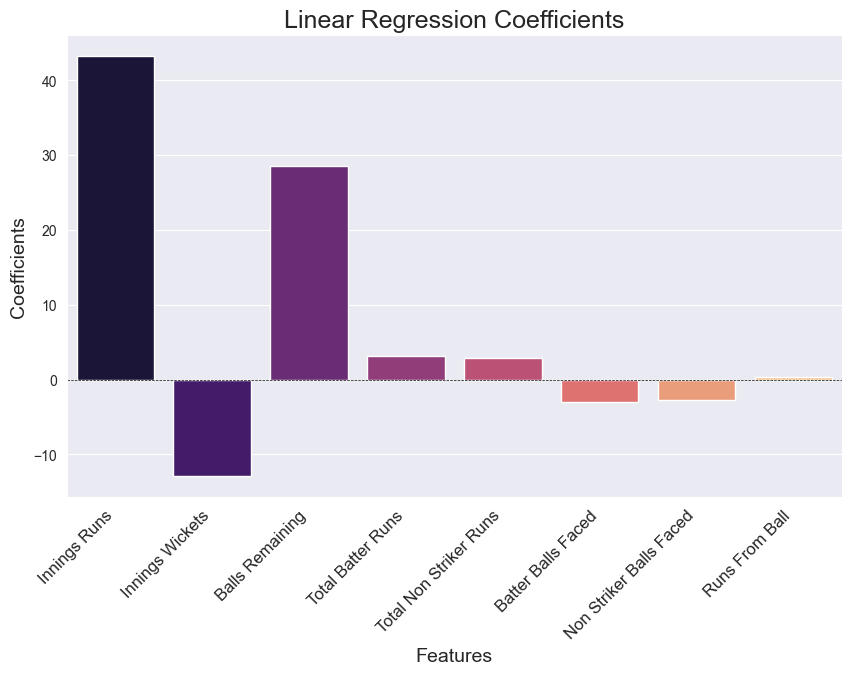

In [5]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=features, y=reg.coef_, ax=ax, palette='magma')

ax.set_title('Linear Regression Coefficients', fontsize=18)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Coefficients', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

In [6]:
params = {
    'objective': 'reg:squarederror',  # Regression task with mean squared error loss
    'eval_metric': 'rmse',  # Root mean squared error as the evaluation metric
    'learning_rate': 0.1,  # Step size shrinkage used in updates to prevent overfitting
    'max_depth': 3,  # Maximum depth of a tree
    'n_estimators': 500,  # Number of trees to fit
    # You can include additional parameters as needed
    'subsample': 0.8,  # Fraction of samples used for tree building
    'colsample_bytree': 0.8,  # Fraction of features used for tree building
    'gamma': 0,  # Minimum loss reduction required to make a further partition on a leaf node
    'alpha': 0,  # L1 regularization term on weights
    'lambda': 1,  # L2 regularization term on weights
}


xgb_reg = xgb.XGBRegressor(**params)

xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: {}'.format(mse))
print('R2 Score: {}'.format(r2))

NameError: name 'xgb' is not defined

In [ ]:
df = innings1
phases = ['Powerplay', 'Middle Overs', 'Final Overs']
for i, phase in enumerate(phases):
    print('Phase of Play: ', phase)
    if i == 0:
        data = df[df['Balls Remaining'] > 84]
        
    elif i == 1:
        data = df[df['Balls Remaining'] > 30]
        data = df[df['Balls Remaining'] <= 84]
    else:
        data = df[df['Balls Remaining'] <= 30]

    features = ['Innings Runs', 'Innings Wickets', 'Balls Remaining', 'Total Batter Runs','Total Non Striker Runs','Batter Balls Faced','Non Striker Balls Faced', 'Runs From Ball']

    cutoff_date = '2018-01-01'

    train_data = data[data['Date'] < cutoff_date]
    test_data = data[data['Date'] >= cutoff_date]

    X_train = train_data[features]
    y_train = train_data['Target Score']
    X_test = test_data[features]
    y_test = test_data['Target Score']

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    xgb_reg = xgb.XGBRegressor(**params)

    xgb_reg.fit(X_train, y_train)

    y_pred = xgb_reg.predict(X_test)

    
    MSE = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Mean Squared Error: {}'.format(MSE))
    print('R2 Score: {}'.format(r2))
    print()

Phase of Play:  Powerplay


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Mean Squared Error: 1435.7067387018483
R2 Score: 0.17823028851822342

Phase of Play:  Middle Overs


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Mean Squared Error: 484.64537752607436
R2 Score: 0.6981132059919561

Phase of Play:  Final Overs


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Mean Squared Error: 212.65307876305695
R2 Score: 0.8557346570026331



In [ ]:
import pickle
pickle.dump(scaler,open('t20_Predictor.pkl','wb'))

NameError: name 'scaler' is not defined